## STATISTICS FOR ALL TYPES OF IDENTIFIERS

In [70]:
import os, json
from collections import defaultdict

file = os.path.join('..', '..', 'data', 'share-jan-2019.json')

records_without_identifiers = 0
identifier_occurrences = defaultdict(int)
identifier_records = defaultdict(int)
identifiers_per_publication = []

with open(file, 'r') as f:
    for line in f:
        data = json.loads(line)
        if len(data['identifiers']) == 0:
            records_without_identifiers += 1
        else:
            identifiers_per_publication.append(len(data['identifiers']))
            
            record_identifiers = set()
            for identifier in data['identifiers']:
                if identifier.startswith('http://'):
                    identifier = identifier.replace('http://', '')
                
                identifier = identifier.split('/', 1)[0]
                
                identifier_occurrences[identifier] += 1
                record_identifiers.add(identifier)
            
            for identifier in record_identifiers:
                identifier_records[identifier] += 1

In [72]:
import csv
with open(os.path.join('..', '..', 'data_exploration_results', 'identifiers.csv'), 'w') as o:
    writer = csv.writer(o)
    writer.writerow(['Identifier', 'Records', 'Occurrences'])
    
    for identifier, occurrences in sorted(identifiers.items(), key = lambda kv : kv[1], reverse = True):
        writer.writerow([identifier, identifier_records[identifier], occurrences])

In [76]:
records_without_identifiers

0

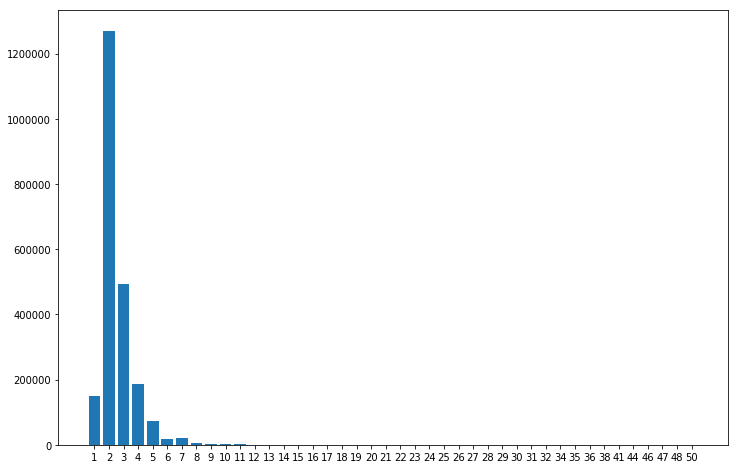

In [133]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

freq, counts = np.unique(np.array(identifiers_per_publication), return_counts = True)

plt.figure(figsize=(12,8))
plt.bar(range(len(freq)), counts)
plt.xticks(range(len(freq)), freq)

plt.show()

In [81]:
# total number of identifiers
len(identifiers.keys())

3930

## STATISTICS FOR DOIs

In [92]:
doi_prefixes = ['http://dx.doi.org/', 'http://doi.org/']

In [111]:
import os, json, re
from collections import defaultdict

file = os.path.join('..', '..', 'data', 'share-jan-2019.json')

records_with_dois = 0
records_with_possible_dois = 0
records_with_multiple_dois = 0

with open(file, 'r') as f:
    for line in f:
        data = json.loads(line)
        
        record_dois = set()
        for identifier in data['identifiers']:
            for doi_prefix in doi_prefixes:
                if identifier.startswith(doi_prefix):
                    record_dois.add(identifier.replace(doi_prefix, ''))
                    break

        if len(record_dois) == 0 and len(added_dois) == 0:
            for identifier in data['identifiers']:
                if re.match('(.*)[=:/]10\.[0-9]{4}(.*)', identifier):
                    records_with_possible_dois += 1
                    break
        
        if len(record_dois) > 0:
            records_with_dois += 1
            
            if len(record_dois) > 1:
                records_with_multiple_dois += 1

In [112]:
records_with_dois

726054

In [113]:
records_with_multiple_dois

17039

In [114]:
records_possible_dois

519

In [ ]:
other_doi_prefixes = [
    'http://link.springer.com/openurl/pdf?id=doi:',
    'http://link.springer.com/openurl/fulltext?id=doi:',
    'http://www.tandfonline.com/doi/full/',
    'http://www.tandfonline.com/doi/abs/',
    'http://tandfonline.com/doi/full/',
    'http://amstat.tandfonline.com/doi/abs/',
    'http://amstat.tandfonline.com/doi/full/',
    'http://aip.scitation.org/doi/am-pdf/',
    'http://online.liebertpub.com/doi/full-xml/',
    'http://onlinelibrary.wiley.com/doi/',
    'http://onlinelibrary.wiley.com/wol1/doi/',
    'http://onlinelibrary.wiley.com/enhanced/doi/',
    'http://aip.scitation.org/doi/pdf/',
    'http://www.emeraldinsight.com/doi/full-xml/',
    'http://www.worldscientific.com/doi/',
    'http://ps.psychiatryonline.org/doi/full/',
    'http://www.journalofforensiceconomics.com/doi/pdf/',
    'http://www.journalofforensiceconomics.com/doi/abs/',
    'http://ajph.aphapublications.org/doi/full/',
    'http://ajph.aphapublications.org/doi/abs/',
    'http://www.futuremedicine.com/doi/full/',
    'http://www.futuremedicine.com/doi/abs/',
    'http://www.futuremedicine.com/doi/pdf/',
    'http://www.blackwell-synergy.com/doi/',
    'http://www.pnas.org/syndication/doi/',
    'http://aca.scitation.org/doi/pdf/',
    'http://www.mitpressjournals.org/doi/abs/',
    'http://www.mitpressjournals.org/doi/full/',
    'http://www.mitpressjournals.org/doi/pdfplus/',
    'http://www.nejm.org/doi/full/',
    'http://www.nejm.org/doi/pdf/',
    'http://aaajournals.org/doi/abs/',
    'http://ajhpcontents.org/doi/',
    'http://journals.sagepub.com/doi/full/',
    'http://journals.sagepub.com/doi/abs/',
    'http://pubs.aeaweb.org/doi/pdfplus/',
    'http://pubs.acs.org/doi/pdf/',
    'http://www.liebertonline.com/doi/pdfplus/',
    'http://www.liebertonline.com/doi/abs/',
    'http://www.journals.uchicago.edu/doi/abs/',
    'http://www.journals.uchicago.edu/doi/pdf/',
    'http://www.journals.uchicago.edu/doi/',
    'http://www.emeraldinsight.com/doi/abs/',
    'http://www.emeraldinsight.com/doi/full/',
    'http://psycnet.apa.org/?&fa=main.doiLanding&doi=',
    'http://ajph.aphapublications.org/doi/pdf/',
    'http://ps.psychiatryonline.org/doi/abs/',
    'http://www.annualreviews.org/doi/abs/',
    'http://www.springerlink.com/openurl.asp?genre=article&id=doi:',
    'http://www.inquiryjournalonline.org/doi/pdf/',
    'http://www.inquiryjournalonline.org/doi/abs/',
    'http://journals.humankinetics.com/doi/abs/',
    'http://www.atypon-link.com/doi/pdfplus/',
    'http://www.atypon-link.com/DH/doi/abs/',
    'http://sor.scitation.org/doi/am-pdf/',
    'http://www.journalsonline.tandf.co.uk/openurl.asp?genre=article&id=doi',
    'http://www.aeaweb.org/articles.php?doi=',
    'http://www.iijournals.com/doi/abs/',
    'http://www.maneyonline.com/doi/abs/',
    'http://www.developmentbookshelf.com/doi/abs/',
    'http://thejns.org/doi/pdf/',
    'http://online.liebertpub.com/doi/',
    ' http://www.annualreviews.org/doi/pdf/',
    'http://publications.amsus.org/doi/abs/',
    'http://ps.psychiatryonline.org/doi/',
    'http://ejournals.duncker-humblot.de/doi/abs/',
    'http://ajp.psychiatryonline.org/doi/',
    'http://www.informapharmascience.com/doi/abs/',
    'http://publications.amsus.org/action/showMultipleAbstracts?doi=',
    'http://journals.ametsoc.org/doi/pdf/',
    ' http://www.annualreviews.org/doi/pdf/',
    'http://link.aps.org/doi/',
    'oai://nature.com/',
    'http://journals.aps.org/prl/abstract/',
    'http://www.frontiersin.org/articles/'
]